## **Index Tracking and Forward Testing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
components = pd.read_csv('Component_prices.csv', parse_dates = ["Date"], index_col = "Date")
ibov = pd.read_csv('BVSP.csv', parse_dates = ["Date"], index_col = "Date")

In [3]:
components.head()

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA,...,SANB11.SA,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.113138,NaN,12.95,29.900000,9.076981,13.379374,NaN,5.722775,NaN,34.705620,...,23.750000,11.316666,16.007999,12.490000,7.951558,7.3125,25.500000,51.490002,2.711538,8.070000
2010-01-05,6.149098,NaN,13.00,29.600000,8.948147,13.308395,NaN,5.948933,NaN,35.405045,...,23.980000,11.333333,16.007999,12.493333,7.818478,7.3125,25.575001,51.970001,2.705621,8.166666
2010-01-06,6.211828,NaN,13.49,29.639999,8.895441,13.201928,NaN,6.243922,NaN,35.900841,...,23.860001,11.330000,16.007999,12.493333,7.865056,7.3125,25.549999,53.070000,2.720414,8.300000
2010-01-07,6.240995,NaN,13.81,29.650000,8.874945,13.166439,NaN,6.381583,NaN,36.299248,...,23.690001,11.150000,16.007999,12.493333,7.871710,7.3125,25.790001,53.290001,2.766272,8.166666
2010-01-08,6.229008,NaN,13.49,29.820000,8.886657,13.152244,NaN,6.784734,NaN,36.830456,...,23.450001,11.336666,16.007999,12.466666,7.948231,7.3125,25.424999,53.810001,2.866863,8.166666


In [4]:
components.tail()

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA,...,SANB11.SA,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-20,13.53,11.25,12.77,40.070000,12.86,14.67,35.040001,15.51,21.389999,32.029999,...,29.180000,53.599998,47.139999,35.220001,29.100000,12.62,8.29,93.989998,37.330002,9.42
2023-01-23,13.42,11.38,12.65,39.770000,12.45,14.05,35.320000,14.96,20.930000,31.620001,...,28.110001,52.389999,46.980000,35.540001,29.639999,12.44,8.34,94.300003,37.369999,9.38
2023-01-24,13.61,11.74,12.84,39.570000,12.59,14.17,35.700001,14.73,21.209999,31.980000,...,28.650000,53.830002,47.509998,35.720001,30.219999,12.97,8.27,95.300003,37.209999,9.55
2023-01-25,13.71,11.99,13.11,40.650002,12.61,14.10,37.180000,14.87,21.760000,32.230000,...,28.889999,54.540001,46.770000,35.830002,29.990000,13.16,8.28,96.199997,38.720001,9.62
2023-01-26,13.74,12.04,13.12,40.630001,12.58,14.14,37.060001,14.75,21.660000,32.860001,...,29.030001,54.060001,45.400002,36.270000,29.520000,13.15,8.59,98.000000,38.209999,9.60


In [5]:
# Some stocks have high numbers of missing values

components.isna().sum().nlargest(20)

NTCO3.SA     2473
HAPV3.SA     2065
IRBR3.SA     1876
CRFB3.SA     1869
AZUL4.SA     1800
BPAC11.SA    1770
RAIL3.SA     1299
KLBN11.SA    1004
CVCB3.SA      975
BBSE3.SA      820
COGN3.SA      544
QUAL3.SA      368
MGLU3.SA      327
ECOR3.SA       60
B3SA3.SA        2
ABEV3.SA        0
BBAS3.SA        0
BBDC3.SA        0
BBDC4.SA        0
BEEF3.SA        0
dtype: int64

In [6]:
# Dropping the stocks columns with missing values above 15%

missing_values = components.isna().sum() / len(components)
cols_to_drop = missing_values[missing_values > 0.15].index
components = components.drop(cols_to_drop, axis=1)

In [7]:
components.isna().sum().nlargest(20)

QUAL3.SA    368
MGLU3.SA    327
ECOR3.SA     60
B3SA3.SA      2
ABEV3.SA      0
BBAS3.SA      0
BBDC3.SA      0
BBDC4.SA      0
BEEF3.SA      0
BRAP4.SA      0
BRFS3.SA      0
BRKM5.SA      0
BRSR6.SA      0
CCRO3.SA      0
CIEL3.SA      0
CMIG4.SA      0
CPFE3.SA      0
CSAN3.SA      0
CSNA3.SA      0
CYRE3.SA      0
dtype: int64

In [8]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,68587.0,70081.0,68587.0,70045.0,70045.0,1655400
2010-01-05,70046.0,70595.0,69928.0,70240.0,70240.0,1984200
2010-01-06,70237.0,70937.0,70016.0,70729.0,70729.0,2243600
2010-01-07,70723.0,70723.0,70045.0,70451.0,70451.0,1555000
2010-01-08,70455.0,70766.0,70158.0,70263.0,70263.0,1634400


In [9]:
ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3235 entries, 2010-01-04 to 2023-01-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3235 non-null   float64
 1   High       3235 non-null   float64
 2   Low        3235 non-null   float64
 3   Close      3235 non-null   float64
 4   Adj Close  3235 non-null   float64
 5   Volume     3235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 176.9 KB


In [10]:
# We are only interested in the 'close' prices

ibov = ibov.loc[:, 'Close']
ibov

Date
2010-01-04     70045.0
2010-01-05     70240.0
2010-01-06     70729.0
2010-01-07     70451.0
2010-01-08     70263.0
                ...   
2023-01-20    112301.0
2023-01-23    111709.0
2023-01-24    113028.0
2023-01-25    114195.0
2023-01-26    114109.0
Name: Close, Length: 3235, dtype: float64

In [11]:
df = pd.concat([components, ibov], axis=1)
df

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BEEF3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BRSR6.SA,...,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA,Close
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.113138,12.95,29.900000,9.076981,13.379374,5.722775,34.705620,22.895000,14.250000,14.60,...,11.316666,16.007999,12.490000,7.951558,7.3125,25.500000,51.490002,2.711538,8.070000,70045.0
2010-01-05,6.149098,13.00,29.600000,8.948147,13.308395,5.948933,35.405045,23.135000,14.120000,14.30,...,11.333333,16.007999,12.493333,7.818478,7.3125,25.575001,51.970001,2.705621,8.166666,70240.0
2010-01-06,6.211828,13.49,29.639999,8.895441,13.201928,6.243922,35.900841,23.450001,14.460000,14.35,...,11.330000,16.007999,12.493333,7.865056,7.3125,25.549999,53.070000,2.720414,8.300000,70729.0
2010-01-07,6.240995,13.81,29.650000,8.874945,13.166439,6.381583,36.299248,23.305000,14.100000,14.10,...,11.150000,16.007999,12.493333,7.871710,7.3125,25.790001,53.290001,2.766272,8.166666,70451.0
2010-01-08,6.229008,13.49,29.820000,8.886657,13.152244,6.784734,36.830456,23.400000,13.900000,14.00,...,11.336666,16.007999,12.466666,7.948231,7.3125,25.424999,53.810001,2.866863,8.166666,70263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-20,13.530000,12.77,40.070000,12.860000,14.670000,15.510000,32.029999,7.900000,21.459999,9.65,...,53.599998,47.139999,35.220001,29.100000,12.6200,8.290000,93.989998,37.330002,9.420000,112301.0
2023-01-23,13.420000,12.65,39.770000,12.450000,14.050000,14.960000,31.620001,7.790000,21.660000,9.40,...,52.389999,46.980000,35.540001,29.639999,12.4400,8.340000,94.300003,37.369999,9.380000,111709.0
2023-01-24,13.610000,12.84,39.570000,12.590000,14.170000,14.730000,31.980000,8.020000,22.980000,9.52,...,53.830002,47.509998,35.720001,30.219999,12.9700,8.270000,95.300003,37.209999,9.550000,113028.0


In [12]:
df.rename({'Close': 'IBOV'}, axis=1, inplace=True)

In [13]:
info = pd.read_csv('Components.csv')
info.head()

,Código,Ação,Setor
0,ABEV3.SA,AMBEV S/A,Consumo não Cíclico / Bebidas / Cervejas e Ref...
1,AZUL4.SA,AZUL,Bens Industriais / Transporte / Transporte Aéreo
2,B3SA3.SA,B3,Financeiro e Outros / Serviços Financeiros Div...
3,BBAS3.SA,BANCO DO BRASIL,Financeiro e Outros / Intermediários Financeir...
4,BBDC3.SA,BRADESCO,Financeiro e Outros / Intermediários Financeir...


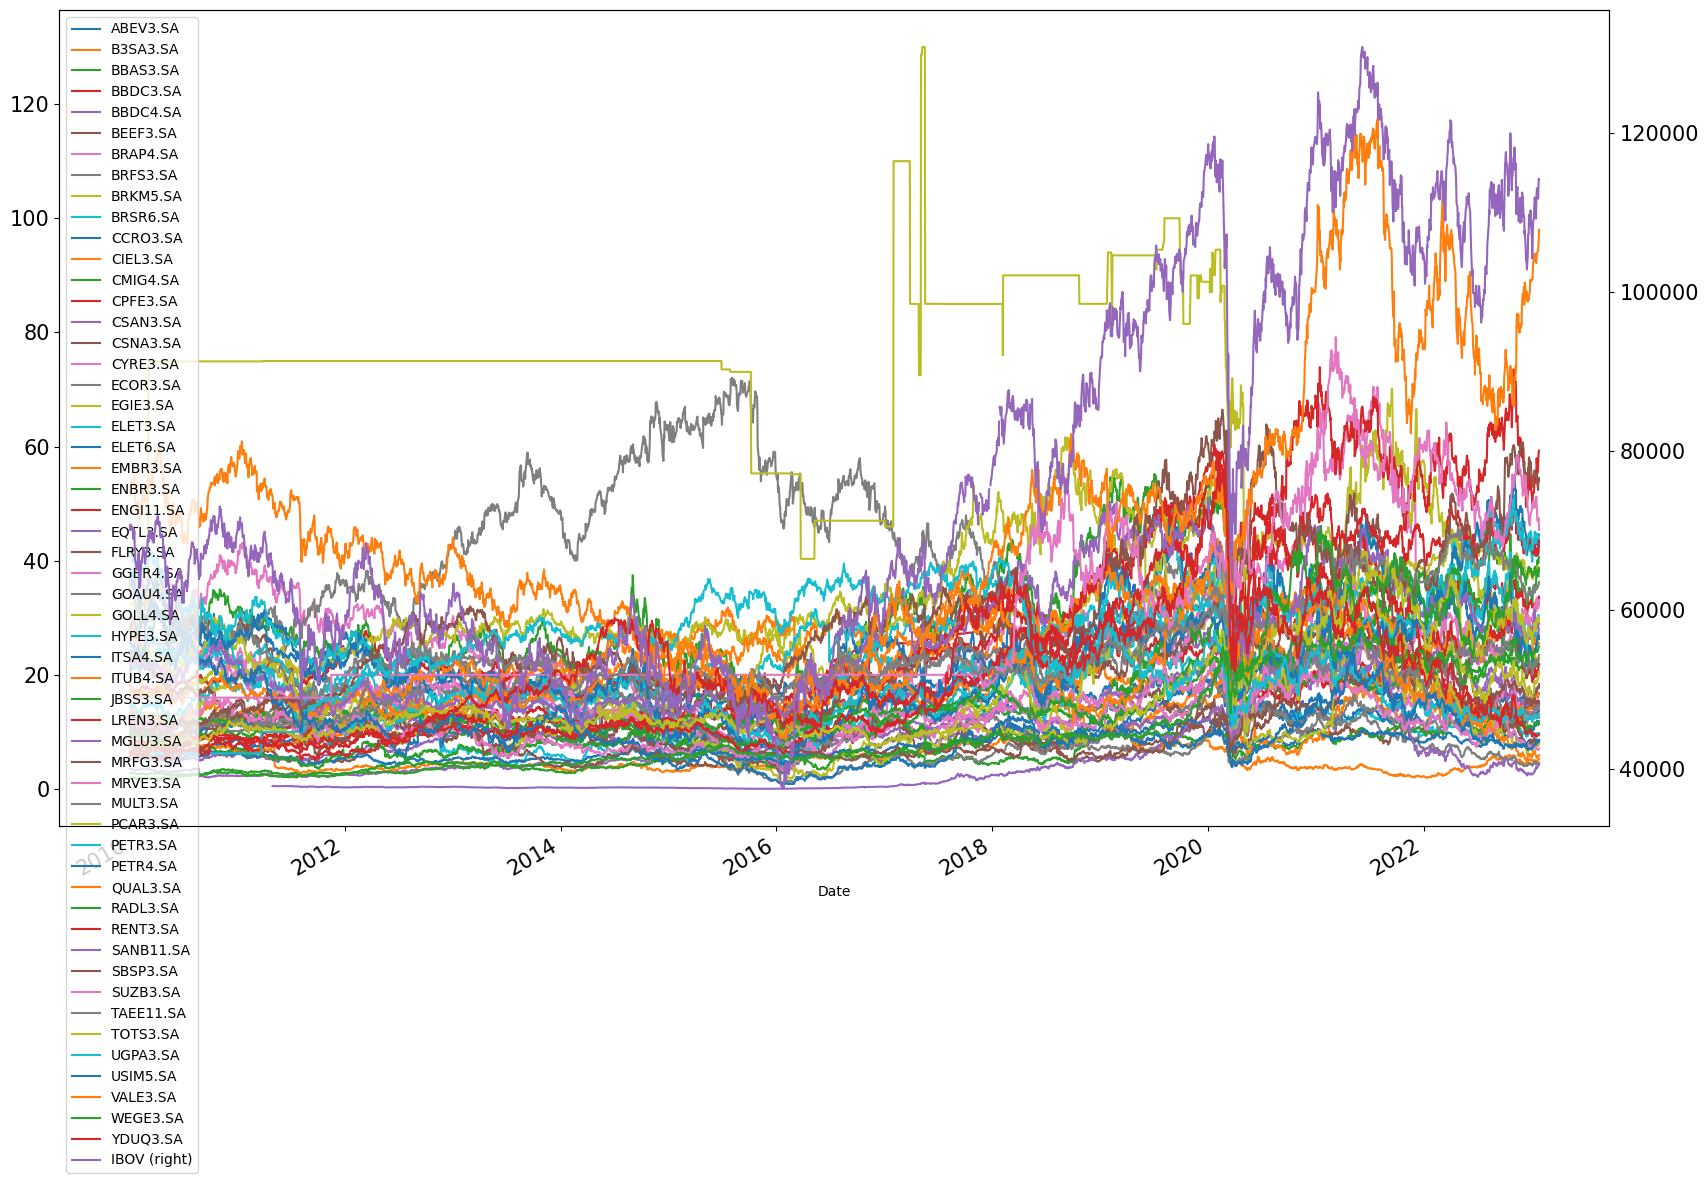

In [14]:
df.plot(figsize = (20, 12), fontsize = 15, secondary_y = "IBOV")
plt.show()

This graph shows the absolute price of the stocks which isn't that so meaningful, so we need  to look at the relative prices.

In [15]:
# Normalizing the stock prices by its initial values

df.div(df.iloc[0]).mul(100)

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BEEF3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BRSR6.SA,...,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA,IBOV
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.588237,100.386102,98.996658,98.580654,99.469496,103.951896,102.015307,101.048263,99.087718,97.945204,...,100.147282,100.000000,100.026686,98.326366,100.000000,100.294121,100.932219,99.781782,101.197848,100.278392
2010-01-06,101.614392,104.169884,99.130434,98.000001,98.673739,109.106548,103.443883,102.424111,101.473684,98.287671,...,100.117829,100.000000,100.026686,98.912137,100.000000,100.196075,103.068553,100.327336,102.850068,100.976515
2010-01-07,102.091507,106.640931,99.163880,97.774195,98.408487,111.512042,104.591844,101.790783,98.947371,96.575343,...,98.527251,100.000000,100.026686,98.995816,100.000000,101.137258,103.495823,102.018559,101.197848,100.579627
2010-01-08,101.895426,104.169884,99.732442,97.903225,98.302387,118.556711,106.122455,102.205718,97.543857,95.890408,...,100.176735,100.000000,99.813182,99.958160,100.000000,99.705879,104.505729,105.728296,101.197848,100.311228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-20,221.326580,98.610044,134.013379,141.677065,109.646390,271.022367,92.290525,34.505350,150.596485,66.095886,...,473.637732,294.477768,281.985603,365.966015,172.581195,32.509804,182.540289,1376.709483,116.728630,160.326933
2023-01-23,219.527183,97.683396,133.010037,137.160146,105.012392,261.411642,91.109166,34.024895,151.999999,64.383557,...,462.945544,293.478269,284.547651,372.757125,170.119652,32.705883,183.142358,1378.184554,116.232967,159.481762
2023-01-24,222.635236,99.150582,132.341138,138.702513,105.909294,257.392604,92.146458,35.029484,161.263155,65.205481,...,475.670162,296.789106,285.988806,380.051292,177.367525,32.431374,185.084482,1372.283849,118.339536,161.364837


In [16]:
normalized = df.div(df.iloc[0]).mul(100)

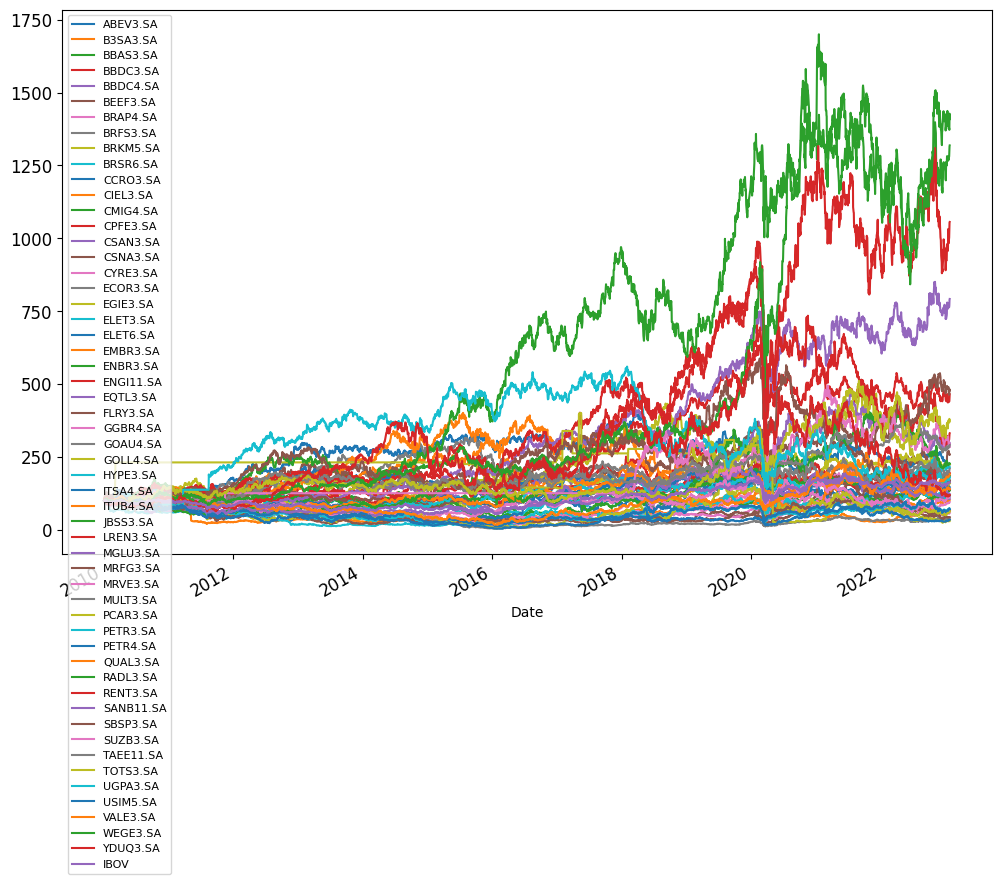

In [17]:
normalized.plot(figsize=(12,8), fontsize=12)
plt.legend(fontsize=8)
plt.show()

Now, all stocks are starting at the same place and in this way we can clearly see their performance.

In [18]:
# Now looking for daily returns

returns = df.pct_change()
returns

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BEEF3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BRSR6.SA,...,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA,IBOV
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.005882,0.003861,-0.010033,-0.014193,-0.005305,0.039519,0.020153,0.010483,-0.009123,-0.020548,...,0.001473,0.000000,0.000267,-0.016736,0.000000,0.002941,0.009322,-0.002182,0.011978,0.002784
2010-01-06,0.010202,0.037692,0.001351,-0.005890,-0.008000,0.049587,0.014004,0.013616,0.024079,0.003497,...,-0.000294,0.000000,0.000000,0.005957,0.000000,-0.000978,0.021166,0.005467,0.016327,0.006962
2010-01-07,0.004695,0.023721,0.000337,-0.002304,-0.002688,0.022047,0.011097,-0.006183,-0.024896,-0.017422,...,-0.015887,0.000000,0.000000,0.000846,0.000000,0.009393,0.004145,0.016857,-0.016064,-0.003930
2010-01-08,-0.001921,-0.023172,0.005734,0.001320,-0.001078,0.063174,0.014634,0.004076,-0.014184,-0.007092,...,0.016741,0.000000,-0.002134,0.009721,0.000000,-0.014153,0.009758,0.036363,0.000000,-0.002669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-20,-0.008065,-0.015420,0.024546,-0.019069,-0.014113,0.003884,0.003761,0.023316,-0.022324,-0.020305,...,-0.031442,-0.044589,-0.010118,-0.018550,-0.019425,0.027261,0.002667,-0.015299,-0.004228,-0.006239
2023-01-23,-0.008130,-0.009397,-0.007487,-0.031882,-0.042263,-0.035461,-0.012800,-0.013924,0.009320,-0.025907,...,-0.022575,-0.003394,0.009086,0.018557,-0.014263,0.006031,0.003298,0.001071,-0.004246,-0.005272
2023-01-24,0.014158,0.015020,-0.005029,0.011245,0.008541,-0.015374,0.011385,0.029525,0.060942,0.012766,...,0.027486,0.011281,0.005065,0.019568,0.042605,-0.008393,0.010604,-0.004282,0.018124,0.011807


In [19]:
# Here we can see two of the most important metrics in finance 'mean' and 'risk' ('std') for each stock

returns.describe()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BEEF3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BRSR6.SA,...,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA,IBOV
count,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,...,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000
mean,0.000389,0.000413,0.000424,0.000325,0.000250,0.000587,0.000375,-0.000038,0.000589,0.000207,...,0.000746,0.000473,0.000460,0.000668,0.000476,0.000279,0.000542,0.001020,0.000505,0.000271
std,0.016703,0.026344,0.025640,0.021156,0.021548,0.024288,0.027407,0.023539,0.029961,0.025665,...,0.022988,0.017528,0.016132,0.022963,0.025054,0.035291,0.026211,0.020153,0.030086,0.015457
min,-0.157818,-0.661336,-0.211712,-0.160127,-0.173843,-0.185748,-0.460883,-0.197471,-0.244731,-0.201531,...,-0.178300,-0.161309,-0.180328,-0.153436,-0.213580,-0.212329,-0.245592,-0.206197,-0.251744,-0.147797
25%,-0.008418,-0.013327,-0.013236,-0.011473,-0.010995,-0.013000,-0.013321,-0.011473,-0.014245,-0.014488,...,-0.012255,0.000000,-0.006723,-0.012296,-0.008785,-0.019012,-0.013822,-0.010168,-0.015552,-0.008155
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000196,0.000000,0.000000,...,0.000752,0.000000,0.000000,0.000000,0.000000,-0.001202,0.000000,0.000122,0.000000,0.000288
75%,0.009445,0.014204,0.013608,0.011542,0.011321,0.012873,0.013755,0.011067,0.013428,0.014377,...,0.013093,0.000000,0.007729,0.013426,0.009224,0.017449,0.013569,0.011631,0.016179,0.008935
max,0.112924,0.192447,0.171261,0.163276,0.168669,0.181818,0.182515,0.162781,0.317544,0.150070,...,0.174603,0.250000,0.127091,0.197996,0.597444,0.351064,0.213579,0.138944,0.237365,0.139082


In [20]:
# Evaluating the risk and return 

def rnr(returns):
    summary = returns.agg(['mean', 'std']).T
    summary['Return'] = summary['mean'] * 252 #We have, approximately, 252 trading days in a year
    summary['Risk'] = summary['std'] * np.sqrt(252)
    summary.drop(columns=['mean', 'std'], inplace=True)
    return summary

In [21]:
# Using the functions to evaluate the return and risk for each stock

rnr(returns)

,Return,Risk
ABEV3.SA,0.098141,0.265151
B3SA3.SA,0.104085,0.418200
BBAS3.SA,0.106937,0.407016
BBDC3.SA,0.081796,0.335838
BBDC4.SA,0.062924,0.342065
BEEF3.SA,0.147814,0.385554
BRAP4.SA,0.094445,0.435078
BRFS3.SA,-0.009636,0.373665
BRKM5.SA,0.148328,0.475619
BRSR6.SA,0.052160,0.407417


In [22]:
summary = rnr(returns)

In [23]:
info.head()

,Código,Ação,Setor
0,ABEV3.SA,AMBEV S/A,Consumo não Cíclico / Bebidas / Cervejas e Ref...
1,AZUL4.SA,AZUL,Bens Industriais / Transporte / Transporte Aéreo
2,B3SA3.SA,B3,Financeiro e Outros / Serviços Financeiros Div...
3,BBAS3.SA,BANCO DO BRASIL,Financeiro e Outros / Intermediários Financeir...
4,BBDC3.SA,BRADESCO,Financeiro e Outros / Intermediários Financeir...


In [24]:
# Let's clear the name for each 'Código'

summary = summary.merge(info.loc[:, ['Código', 'Ação']], how='left', left_index=True, right_on='Código')
summary

,Return,Risk,Código,Ação
0.0,0.098141,0.265151,ABEV3.SA,AMBEV S/A
2.0,0.104085,0.418200,B3SA3.SA,B3
3.0,0.106937,0.407016,BBAS3.SA,BANCO DO BRASIL
4.0,0.081796,0.335838,BBDC3.SA,BRADESCO
5.0,0.062924,0.342065,BBDC4.SA,BRADESCO
7.0,0.147814,0.385554,BEEF3.SA,MINERVA
9.0,0.094445,0.435078,BRAP4.SA,BRADESPAR
11.0,-0.009636,0.373665,BRFS3.SA,BRF SA
12.0,0.148328,0.475619,BRKM5.SA,BRASKEM
14.0,0.052160,0.407417,BRSR6.SA,BANRISUL


In [26]:
summary.rename(columns={'Ação': 'Empresa'}, inplace=True)
summary

,Return,Risk,Código,Empresa
0.0,0.098141,0.265151,ABEV3.SA,AMBEV S/A
2.0,0.104085,0.418200,B3SA3.SA,B3
3.0,0.106937,0.407016,BBAS3.SA,BANCO DO BRASIL
4.0,0.081796,0.335838,BBDC3.SA,BRADESCO
5.0,0.062924,0.342065,BBDC4.SA,BRADESCO
7.0,0.147814,0.385554,BEEF3.SA,MINERVA
9.0,0.094445,0.435078,BRAP4.SA,BRADESPAR
11.0,-0.009636,0.373665,BRFS3.SA,BRF SA
12.0,0.148328,0.475619,BRKM5.SA,BRASKEM
14.0,0.052160,0.407417,BRSR6.SA,BANRISUL


In [28]:
summary.set_index('Empresa', inplace=True)
summary

,Return,Risk,Código
Empresa,,,
AMBEV S/A,0.098141,0.265151,ABEV3.SA
B3,0.104085,0.418200,B3SA3.SA
BANCO DO BRASIL,0.106937,0.407016,BBAS3.SA
BRADESCO,0.081796,0.335838,BBDC3.SA
BRADESCO,0.062924,0.342065,BBDC4.SA
MINERVA,0.147814,0.385554,BEEF3.SA
BRADESPAR,0.094445,0.435078,BRAP4.SA
BRF SA,-0.009636,0.373665,BRFS3.SA
BRASKEM,0.148328,0.475619,BRKM5.SA


In [29]:
summary.rename(index= {np.nan: 'IBOVESPA'}, inplace=True)

In [30]:
summary

,Return,Risk,Código
Empresa,,,
AMBEV S/A,0.098141,0.265151,ABEV3.SA
B3,0.104085,0.418200,B3SA3.SA
BANCO DO BRASIL,0.106937,0.407016,BBAS3.SA
BRADESCO,0.081796,0.335838,BBDC3.SA
BRADESCO,0.062924,0.342065,BBDC4.SA
MINERVA,0.147814,0.385554,BEEF3.SA
BRADESPAR,0.094445,0.435078,BRAP4.SA
BRF SA,-0.009636,0.373665,BRFS3.SA
BRASKEM,0.148328,0.475619,BRKM5.SA
